In [1]:
import pandas as pd
import numpy as np
import glob
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
# from sliderule import sliderule, icesat2, earthdata
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)



In [4]:
# load time, lat and lon
kd_argo = pd.read_csv("Dataset_Kd_Paper_2018_dep.csv")

gdf = pd.read_pickle("icesat2_3873.pkl")
reproj_gdf = gdf.to_crs("EPSG:4326")
reproj_gdf['geometry']


time
2021-07-10 17:07:59.367771392    POINT (-19.12241 -20.28005)
2021-07-10 17:07:59.367871488    POINT (-19.12241 -20.28005)
2021-07-10 17:07:59.367971328    POINT (-19.12241 -20.28004)
2021-07-10 17:07:59.368571392       POINT (-19.12241 -20.28)
2021-07-10 17:07:59.368571392       POINT (-19.12241 -20.28)
                                            ...             
2021-07-10 17:08:00.275271424    POINT (-19.12533 -20.24404)
2021-07-10 17:08:00.275371520    POINT (-19.12533 -20.24403)
2021-07-10 17:08:00.275371520    POINT (-19.12533 -20.24403)
2021-07-10 17:08:00.275371520    POINT (-19.12533 -20.24403)
2021-07-10 17:08:00.275671552    POINT (-19.12533 -20.24401)
Name: geometry, Length: 19137, dtype: geometry

In [5]:
gdf

,pair,segment_dist,solar_elevation,region,sc_orient,cycle,background_rate,segment_id,track,rgt,height,landcover,relief,y_atc,quality_ph,snowcover,atl03_cnf,yapc_score,x_atc,atl08_class,geometry,spot
time,,,,,,,,,,,,,,,,,,,,,,
2021-07-10 17:07:59.367771392,0,3.788852e+07,20.458055,14,1,12,826882.593910,1894631,1,260,6.926468,255,0.0,3276.164062,0,255,1,0,-17.325272,4,POINT (-19.12241 -20.28005),6
2021-07-10 17:07:59.367871488,0,3.788852e+07,20.458055,14,1,12,826882.593910,1894631,1,260,1.763406,255,0.0,3276.200684,0,255,2,0,-16.601936,4,POINT (-19.12241 -20.28005),6
2021-07-10 17:07:59.367971328,0,3.788852e+07,20.458055,14,1,12,826882.593910,1894631,1,260,23.214853,255,0.0,3276.045410,0,255,0,0,-15.940920,4,POINT (-19.12241 -20.28004),6
2021-07-10 17:07:59.368571392,0,3.788852e+07,20.458055,14,1,12,826882.593910,1894631,1,260,-17.961861,255,0.0,3276.339355,0,255,0,0,-11.579042,4,POINT (-19.12241 -20.28),6
2021-07-10 17:07:59.368571392,0,3.788852e+07,20.458055,14,1,12,826882.593910,1894631,1,260,25.547619,255,0.0,3276.025391,0,255,0,0,-11.680217,4,POINT (-19.12241 -20.28),6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-10 17:08:00.275271424,1,3.789249e+07,20.477568,14,1,12,873907.331289,1894829,1,260,1.753770,255,0.0,3187.437988,0,255,4,0,17.130833,4,POINT (-19.12533 -20.24404),5
2021-07-10 17:08:00.275371520,1,3.789249e+07,20.477568,14,1,12,873907.331289,1894829,1,260,-21.612541,255,0.0,3187.604736,0,255,0,0,17.767096,4,POINT (-19.12533 -20.24403),5
2021-07-10 17:08:00.275371520,1,3.789249e+07,20.477568,14,1,12,873907.331289,1894829,1,260,-16.558075,255,0.0,3187.569336,0,255,0,0,17.782476,4,POINT (-19.12533 -20.24403),5


<Axes: >

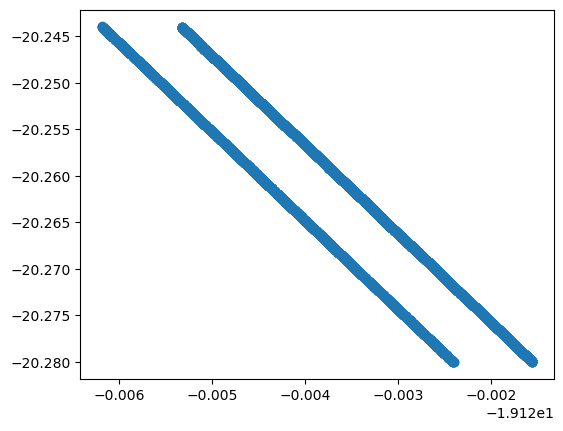

In [44]:
gdf.plot(aspect=1/10)

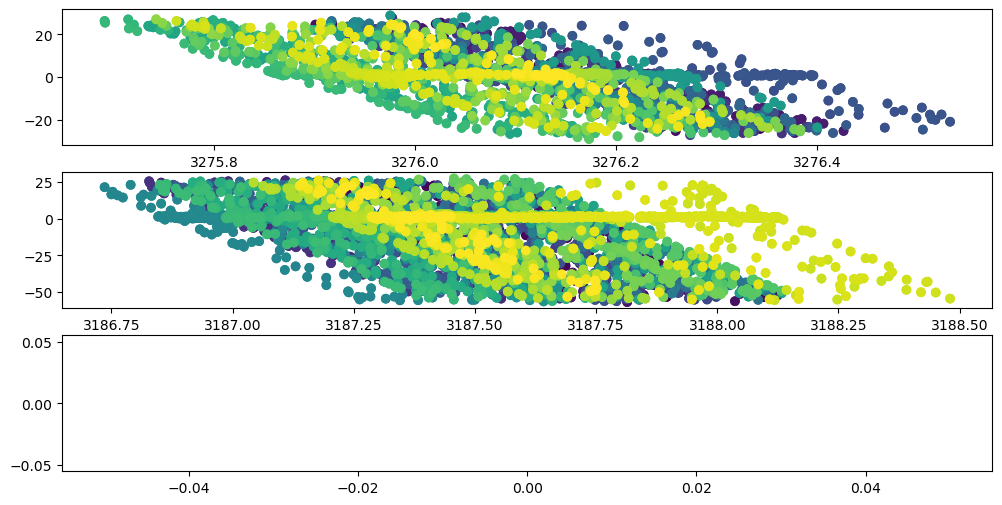

In [37]:
fig,ax = plt.subplots(3,1,figsize=(12,6))
for jj in range(2): 
    idx = gdf['pair']==jj
    ax[jj].scatter(gdf['y_atc'][idx],gdf['height'][idx],c=gdf['segment_id'][idx])

